In [734]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [735]:
TRAIN_DATA="data\\train.csv"
TEST_DATA="data\\test.csv"
PRED_DATA="data\\pred.csv"
TARGET="data\\target.csv"
SEED=4567

In [736]:
train_data=pd.read_csv(TRAIN_DATA)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [737]:
cat_variables = ['Sex',
'Pclass',
'Embarked',
]

In [738]:
# One hot encoding
train_data = pd.get_dummies(data = train_data,
                         prefix = cat_variables,
                         columns = cat_variables)
train_data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,True,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True,False,False,True


In [739]:
#features = ["Age","Sex_female",	"Sex_male",	"Pclass_1",	"Pclass_2",	"Pclass_3"]#,	"Embarked_C",	"Embarked_Q",	"Embarked_S"]
non_features = ["PassengerId","Survived","Name","Ticket","Cabin","Ticket_item","Ticket_number"]
features = [x for x in train_data.columns if x not in non_features]


In [740]:
X_train,X_cv,y_train,y_cv=train_test_split(train_data[features],train_data["Survived"],train_size=0.80,random_state = SEED)


In [741]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_cv)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 712
validation samples: 179
target proportion: 0.3680


In [742]:
## Single Decision Tree
model = DecisionTreeClassifier(random_state = SEED).fit(X_train,y_train)
predictions_train = model.predict(X_train) ## The predicted values for the train dataset
predictions_val = model.predict(X_cv) ## The predicted values for the test dataset
accuracy_train = accuracy_score(predictions_train,y_train)
accuracy_val = accuracy_score(predictions_val,y_cv)

print (f"Training Accuracy:{accuracy_train}")
print (f"CV Accuracy:{accuracy_val}")


Training Accuracy:0.9817415730337079
CV Accuracy:0.7262569832402235


Training Accuracy:0.9719101123595506
CV Accuracy:0.8044692737430168
Training Accuracy:0.9817415730337079
CV Accuracy:0.8156424581005587
Training Accuracy:0.9831460674157303
CV Accuracy:0.8100558659217877
Training Accuracy:0.9831460674157303
CV Accuracy:0.8044692737430168


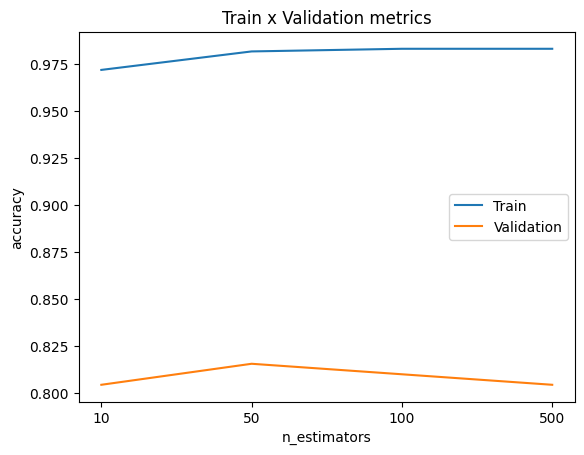

In [743]:
# Random Forest
n_estimators_list = [10,50,100,500]
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators, random_state = SEED).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
    print (f"Training Accuracy:{accuracy_train}")
    print (f"CV Accuracy:{accuracy_val}")

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [744]:
n_est_best=n_estimators_list[np.argmax(accuracy_list_val)]
print(n_est_best)

50


In [745]:
#XGBoost
#Find Best Learning Rate
learning_rates=[0.3,0.1,0.06,0.01,0.006,0.001]
accuracy_list_train=[]
accuracy_list_cv=[]
for l in learning_rates:

    xgb_model = XGBClassifier(n_estimators = n_est_best, learning_rate = l,early_stopping_rounds = 10,random_state = SEED,verbosity=0)
    xgb_model.fit(X_train,y_train, eval_set = [(X_cv,y_cv)])
    xgb_model.best_iteration
    yhat = xgb_model.predict(X_train)
    yhat_cv = xgb_model.predict(X_cv)
    acc_train = accuracy_score(yhat,y_train)
    acc_cv=accuracy_score(yhat_cv,y_cv)
    accuracy_list_train.append(acc_train)
    accuracy_list_cv.append(acc_cv)
    print(f"Metrics train:\n\tAccuracy score: {acc_train:.4f}")
    print(f"Metrics Val: Accuracy score: {acc_cv:.4f}")


[0]	validation_0-logloss:0.57327
[1]	validation_0-logloss:0.50218
[2]	validation_0-logloss:0.47125
[3]	validation_0-logloss:0.45512
[4]	validation_0-logloss:0.44107
[5]	validation_0-logloss:0.43285
[6]	validation_0-logloss:0.43213
[7]	validation_0-logloss:0.43509
[8]	validation_0-logloss:0.43662
[9]	validation_0-logloss:0.43727
[10]	validation_0-logloss:0.44050
[11]	validation_0-logloss:0.44346
[12]	validation_0-logloss:0.44383
[13]	validation_0-logloss:0.43973
[14]	validation_0-logloss:0.44346
[15]	validation_0-logloss:0.45031
[16]	validation_0-logloss:0.45271
Metrics train:
	Accuracy score: 0.8933
Metrics Val: Accuracy score: 0.8101
[0]	validation_0-logloss:0.65226
[1]	validation_0-logloss:0.61469
[2]	validation_0-logloss:0.58398
[3]	validation_0-logloss:0.55834
[4]	validation_0-logloss:0.53531
[5]	validation_0-logloss:0.51702
[6]	validation_0-logloss:0.50084
[7]	validation_0-logloss:0.48779
[8]	validation_0-logloss:0.47934
[9]	validation_0-logloss:0.46909
[10]	validation_0-logloss:0

Max Accuracy at 0.06, Val Accuracy: 0.8212290502793296, Train Accuracy: 0.898876404494382


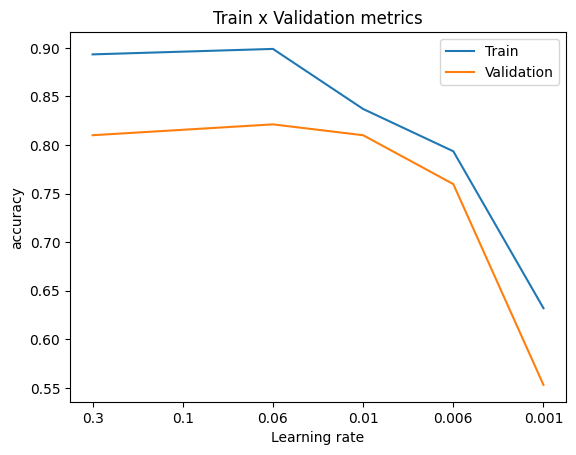

In [746]:
plt.title('Train x Validation metrics')
plt.xlabel('Learning rate')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(learning_rates )),labels=learning_rates)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','Validation'])
plt.show
best_index=np.argmax(accuracy_list_cv)
print(f"Max Accuracy at {learning_rates[best_index]}, Val Accuracy: {accuracy_list_cv[best_index]}, Train Accuracy: {accuracy_list_train[best_index]}")
best_learning_rate = learning_rates[best_index]

In [747]:
#XGBoost
#Find best n_est
MAX_DEPTH=8
accuracy_list_train=[]
accuracy_list_cv=[]
for n in range(1,MAX_DEPTH):

    xgb_model = XGBClassifier    (n_estimators = n_est_best, max_depth=n,learning_rate = best_learning_rate,early_stopping_rounds = 10,random_state = SEED,verbosity=0)
    xgb_model.fit(X_train,y_train, eval_set = [(X_cv,y_cv)])
    xgb_model.best_iteration
    yhat = xgb_model.predict(X_train)
    yhat_cv = xgb_model.predict(X_cv)
    acc_train = accuracy_score(yhat,y_train)
    acc_cv=accuracy_score(yhat_cv,y_cv)
    accuracy_list_train.append(acc_train)
    accuracy_list_cv.append(acc_cv)
    print(f"Metrics train:\n\tAccuracy score: {acc_train:.4f}")
    print(f"Metrics Val: Accuracy score: {acc_cv:.4f}")


[0]	validation_0-logloss:0.68109
[1]	validation_0-logloss:0.66500
[2]	validation_0-logloss:0.65095
[3]	validation_0-logloss:0.63863
[4]	validation_0-logloss:0.62780
[5]	validation_0-logloss:0.61827
[6]	validation_0-logloss:0.60986
[7]	validation_0-logloss:0.60243
[8]	validation_0-logloss:0.59586
[9]	validation_0-logloss:0.59005
[10]	validation_0-logloss:0.58491
[11]	validation_0-logloss:0.57903
[12]	validation_0-logloss:0.57454
[13]	validation_0-logloss:0.56931
[14]	validation_0-logloss:0.56538
[15]	validation_0-logloss:0.56226
[16]	validation_0-logloss:0.55881
[17]	validation_0-logloss:0.55443
[18]	validation_0-logloss:0.55141
[19]	validation_0-logloss:0.54889
[20]	validation_0-logloss:0.54624
[21]	validation_0-logloss:0.54253
[22]	validation_0-logloss:0.54021
[23]	validation_0-logloss:0.53816
[24]	validation_0-logloss:0.53501
[25]	validation_0-logloss:0.53298
[26]	validation_0-logloss:0.53130
[27]	validation_0-logloss:0.52951
[28]	validation_0-logloss:0.52682
[29]	validation_0-loglos

Max Accuracy at 3, Val Accuracy: 0.8268156424581006, Train Accuracy: 0.8693820224719101


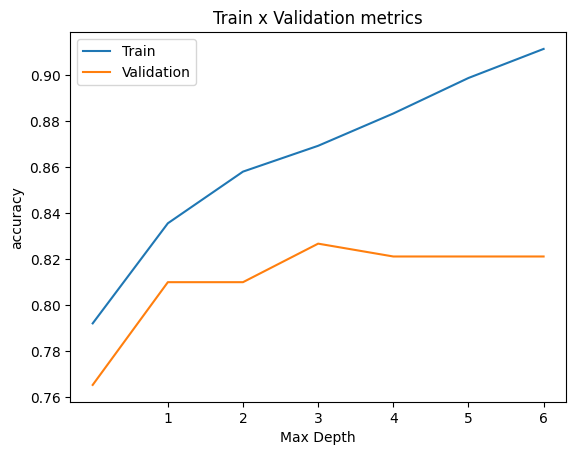

In [748]:
plt.title('Train x Validation metrics')
plt.xlabel('Max Depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(1,MAX_DEPTH),labels=range(1,MAX_DEPTH))
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','Validation'])
plt.show
best_index=np.argmax(accuracy_list_cv)
print(f"Max Accuracy at {best_index}, Val Accuracy: {accuracy_list_cv[best_index]}, Train Accuracy: {accuracy_list_train[best_index]}")

In [749]:
test_data=pd.read_csv(TEST_DATA)
test_data = pd.get_dummies(data = test_data,
                         prefix = cat_variables,
                         columns = cat_variables)
test_data.head()
X_test=test_data[features]
X_test.head()
xgb_model = XGBClassifier    (n_estimators = n_est_best, max_depth=best_index,learning_rate = best_learning_rate,early_stopping_rounds = 10,random_state = SEED,verbosity=0)
xgb_model.fit(X_train,y_train, eval_set = [(X_cv,y_cv)])
yhat = xgb_model.predict(X_train)
yhat_cv = xgb_model.predict(X_cv)
acc_train = accuracy_score(yhat,y_train)
acc_cv=accuracy_score(yhat_cv,y_cv)
accuracy_list_train.append(acc_train)
accuracy_list_cv.append(acc_cv)
print(f"Metrics train:\n\tAccuracy score: {acc_train:.4f}")
print(f"Metrics Val: Accuracy score: {acc_cv:.4f}")

yhat_test = xgb_model.predict(X_test)

[0]	validation_0-logloss:0.67173
[1]	validation_0-logloss:0.64743
[2]	validation_0-logloss:0.62622
[3]	validation_0-logloss:0.60753
[4]	validation_0-logloss:0.59036
[5]	validation_0-logloss:0.57539
[6]	validation_0-logloss:0.56143
[7]	validation_0-logloss:0.54939
[8]	validation_0-logloss:0.53846
[9]	validation_0-logloss:0.52678
[10]	validation_0-logloss:0.51852
[11]	validation_0-logloss:0.51049
[12]	validation_0-logloss:0.50190
[13]	validation_0-logloss:0.49343
[14]	validation_0-logloss:0.48787
[15]	validation_0-logloss:0.48099
[16]	validation_0-logloss:0.47508
[17]	validation_0-logloss:0.47095
[18]	validation_0-logloss:0.46753
[19]	validation_0-logloss:0.46310
[20]	validation_0-logloss:0.46021
[21]	validation_0-logloss:0.45613
[22]	validation_0-logloss:0.45360
[23]	validation_0-logloss:0.45123
[24]	validation_0-logloss:0.44928
[25]	validation_0-logloss:0.44690
[26]	validation_0-logloss:0.44508
[27]	validation_0-logloss:0.44310
[28]	validation_0-logloss:0.44081
[29]	validation_0-loglos

In [750]:
display(test_data.head())
test_data["Survived_pred"]=yhat_test
test_data.head(20)
target_data=pd.read_csv(TARGET)
display(target_data.head())
tmp_acc = pd.merge(test_data, target_data, how="right", on='PassengerId')
tmp_acc.head()
acc_test=accuracy_score(tmp_acc["Survived_pred"],tmp_acc["Survived"])
print(f"Test Accuracy score: {acc_test:.4f}")
test_data.to_csv(PRED_DATA,columns=["PassengerId","Survived_pred"],index=False)


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,False,True,False,False,True,False,True,False
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,True,False,False,False,True,False,False,True
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,False,True,False,True,False,False,True,False
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,False,True,False,False,True,False,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,True,False,False,False,True,False,False,True


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


Test Accuracy score: 0.8792
